<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week4/breast_cancer_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) 데이터 준비

# 'breast_cancer.csv' 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/data/breast_cancer.csv')

df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [28]:
# 'Unnamed: 0' 열 제거 (불필요한 데이터)
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

KeyError: "['Unnamed: 0'] not found in axis"

In [29]:
# 결측치 확인
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [30]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

# label_encoders라는 빈 딕셔너리 먼저 선언
# 각 컬럼별로 LabelEncoder 객체를 저장하는 용도
label_encoders = {}

# df.columns에 있는 각 컬럼에 대해 반복문을 돌면서
for column in df.columns:

    # 해당 컬럼 이름을 키(key)로 하여 LabelEncoder() 객체를 딕셔너리에 생성하고 저장
    label_encoders[column] = LabelEncoder()

    # 해당 컬럼의 데이터를 label_encoders에 저장된 LabelEncoder 객체로 fit_transform() 메서드를 호출하여 변환
    df[column] = label_encoders[column].fit_transform(df[column])

# fit_transform()
# 해당 컬럼의 카테고리(범주형) 데이터를 숫자형으로 변환해주는 역할
# 동일한 딕셔너리에 LabelEncoder 객체를 저장해 둠으로써 나중에 다시 inverse_transform()으로 원래의 값으로 되돌릴 수 있음

In [32]:
# 데이터가 숫자형으로 바꼈는지 확인
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,370,1,455,452,444,531,521,526,416,483,...,41,497,516,358,516,520,483,485,506,0
1,426,186,486,513,120,215,321,396,219,91,...,199,465,511,158,210,278,401,222,375,0
2,406,324,478,487,403,459,478,516,348,184,...,261,455,491,287,464,438,468,445,361,0
3,98,297,164,95,471,533,507,493,426,498,...,298,281,194,408,524,511,479,499,533,0
4,418,60,493,506,332,414,480,492,216,147,...,28,453,470,239,245,415,363,81,216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,438,370,503,522,410,364,509,522,173,74,...,293,480,518,263,255,423,453,21,133,0
565,413,463,483,499,295,312,415,483,187,54,...,494,459,493,116,218,350,364,152,63,0
566,340,458,410,421,115,308,329,335,94,82,...,460,390,413,106,371,366,317,40,244,0
567,429,467,500,501,442,530,530,531,413,424,...,500,497,502,367,525,534,482,472,514,0


In [33]:
# 2) 데이터 분리
# 예측에 사용할 특성(X)과 목표 변수(y) 설정
X = df.drop(columns = ["label"])
y = df["label"]

In [34]:
# 분리 후 확인
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [36]:
# 데이터를 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [37]:
# 각 데이터의 shape 확인 (전체 데이터 수, 컬럼 숫자)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [39]:
## 표준화

# StandardScaler
# 데이터의 각 특성(feature)을 평균이 0이고, 표준편차가 1이 되도록 변환해주는 표준화 도구
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
ss = StandardScaler()

# 학습 데이터 X_train의 각 특성별로 평균과 표준편차를 계산하여 표준화 스케일링 함수(변환기)를 학습함
# 학습 데이터의 통계치 기준을 잡는 단계
ss.fit(X_train)

# 학습 데이터 X_train에 대해 학습된 평균과 표준편차를 이용하여 표준화 수행
# 결과는 평균 0, 표준편차 1인 값들로 변환된 데이
train_scaled = ss.transform(X_train)

# 테스트 데이터 X_test에도 학습된 평균과 표준편차를 이용하여 표준화 수행
# 테스트 데이터는 학습 시 계산된 통계치를 꼭 그대로 사용해야 함
# → 학습 및 테스트 데이터의 분포가 같아져 모델 성능 비교가 합리적임
test_scaled = ss.transform(X_test)

In [45]:
# 3) 모델 구성
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 5)
lr = LogisticRegression(max_iter = 2000)

In [46]:
# 4) 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [47]:
# 5) 예측 결과 생성
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
knn_y_pred = knn.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [48]:
# 정답값 출력
y_test

,label
204,1
70,0
131,0
431,1
540,1
...,...
486,1
75,0
249,1
238,1


In [49]:
# 예측값 출력
dt_y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [50]:
# 6) 딥러닝을 위한 추가 라이브러리 임포트
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
# 7) 딥러닝 모델을 위한 데이터 준비
# 이전 단계에서 생성된 'X'와 'y' 데이터프레임을 사용함

## 특성 표준화
# 스케일러는 훈련 데이터에만 맞춰(fit) 사용하는 것이 더 좋음
# but 편의를 위해 분할 전 전체 데이터셋에 맞춰 사용할 수 있음
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 다중 클래스 분류 문제이므로 타겟 변수 'y'를 원-핫 인코딩함
y_one_hot = pd.get_dummies(y).values

# 스케일링된 특성과 원-핫 인코딩된 타겟을 훈련 및 테스트 세트로 분할
# 이전 모델 분할과의 일관성을 유지하기 위해 random_state=42를 사용
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_scaled, y_one_hot, test_size = 0.2, random_state = 42
)

In [53]:
# 8) 딥러닝 모델 정의
model = models.Sequential([
    # 입력층 및 첫 번째 은닉층
    layers.Dense(64, activation="relu", input_shape=(X_train_dl.shape[1],)),

    # 규제(Regularization)를 위한 드롭아웃
    layers.Dropout(0.3),

    # 두 번째 은닉층
    layers.Dense(32, activation="relu"),

    # 다중 클래스 분류를 위한 소프트맥스(softmax) 출력층
    layers.Dense(y_one_hot.shape[1], activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# 9) 모델 컴파일
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # 원-핫 인코딩된 레이블에 사용
    metrics=["accuracy"]
)

# 모델 구조 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,130 (16.13 KB)

 Trainable params: 4,130 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# 10) 모델 훈련
# 훈련 데이터의 일부를 검증용으로 사용하며 50 에포크(epoch) 동안 모델을 훈련시킴
history = model.fit(
    X_train_dl, y_train_dl,

    # 훈련 데이터의 20%를 검증 데이터로 자동 분리하여 학습 중 검증 성능을 평가
    validation_split = 0.2,

    # 전체 데이터셋을 50번 반복 학습
    epochs = 50,

    # 한 번에 모델에 공급하는 데이터 샘플 개수
    batch_size = 16,

    # 학습 진행 상황을 진행 바 형태로 출력하여 실시간 학습 상태를 보여줌
    verbose = 1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7153 - loss: 0.5672 - val_accuracy: 0.9231 - val_loss: 0.2707
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.2573 - val_accuracy: 0.9560 - val_loss: 0.1715
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9464 - loss: 0.1511 - val_accuracy: 0.9560 - val_loss: 0.1408
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9465 - loss: 0.1383 - val_accuracy: 0.9560 - val_loss: 0.1263
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9777 - loss: 0.1185 - val_accuracy: 0.9670 - val_loss: 0.1115
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9652 - loss: 0.0860 - val_accuracy: 0.9670 - val_loss: 0.1030
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9606 - loss: 0.0823 - val_accuracy: 0.9780 - val_loss: 0.1057
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.0960 - val_accuracy: 0.9780 - val_loss

In [56]:
# 11) 모델 평가 및 예측
print("\n테스트 세트로 모델 평가 중...")
# 테스트 데이터로 예측 수행
y_pred_probs = model.predict(X_test_dl)

# 예측된 확률과 원-핫 인코딩된 테스트 레이블을 다시 클래스 레이블로 변환
y_test_class = np.argmax(y_test_dl, axis=1)
y_pred_class = np.argmax(y_pred_probs, axis=1)

# 상세한 성능 지표를 위해 분류 리포트와 혼동 행렬 출력
print("\n분류 리포트:")
print(classification_report(y_test_class, y_pred_class))

print("\n혼동 행렬:")
print(confusion_matrix(y_test_class, y_pred_class))


테스트 세트로 모델 평가 중...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

분류 리포트:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


혼동 행렬:
[[42  1]
 [ 3 68]]


In [57]:
# 12) 훈련 과정 시각화
# 훈련 기록에서 손실(loss)과 정확도(accuracy) 추출

# 학습 데이터에 대한 손실 함수 값들의 리스트
loss = history.history['loss']

# 검증 데이터에 대한 손실 함수 값들의 리스트
val_loss = history.history['val_loss']

# 학습 데이터에 대한 정확도 리스트
acc = history.history['accuracy']

# 검증 데이터에 대한 정확도 리스트
val_acc = history.history['val_accuracy']

# 1부터 마지막 epoch까지의 정수 시퀀스 (학습 진행 단계)
epochs = range(1, len(loss) + 1)

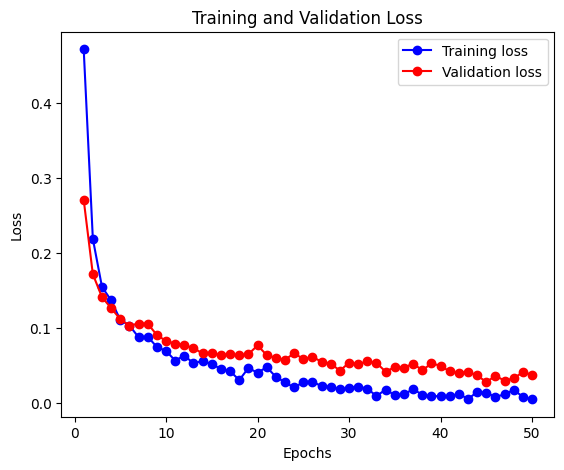

In [62]:
# 훈련 및 검증 손실 그래프
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

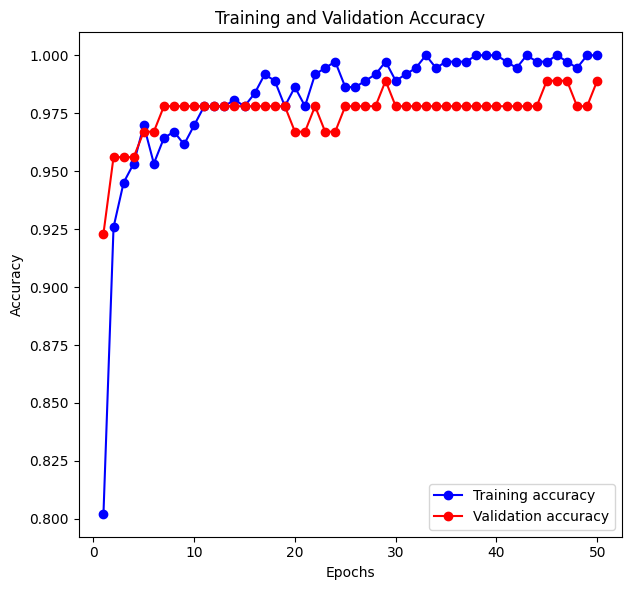

In [63]:
# 훈련 및 검증 정확도 그래프

# 가로 12인치, 세로 6인치 크기 설정
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
# [데이터 결과]
# 1. 훈련 정확도(파란색)와 검증 정확도(빨간색)가 모두 빠르게 상승하여
# 높은 값(0.98~1.00 근처)에서 안정적으로 유지됨

# 2. 훈련 정확도가 거의 1(100%)에 수렴하고, 검증 정확도도 0.97~0.99 사이에서
# 유지되는 것을 볼 때, 모델이 주어진 데이터에 대해 매우 높은 분류 성능을 내고
# 있다는 것을 알 수 있음

# 3. 두 곡선의 차이가 크지 않고, 과도한 과적합(overfitting) 현상도 보이지 않음
# 즉, 모델이 훈련 데이터뿐 아니라 검증(미지의 데이터)에서도 유사하게 높은 성능을
# 내고 있음을 알 수 있음

# 4. epoch가 증가함에 따라 정확도 향상이 빨리 진행된 뒤, 일정 수준 이후에는
# 학습 및 검증 정확도 모두 큰 변동 없이 고정된다는 점도 확인할 수 있음